## **Text Preprocessing and Word Embedding**

Usually One Hot Encoding, BOW, TF-IDF, N-Gram, Custom Technique all these are techniques which converts words to vectors.

This is also called Text Representation, also called Text Encoding

Simply we are converting text into numbers

Where as in Embedding we have Word2Vec Techniques.

Text Encoding techniques are like Frequency Based Encoding and where as Embedding are based on Neural Network.

To find Similarity Between vectors we use Techniques like

1. Dot Product

2. Cosine Similarity

When Ever we are working on the projects we need to follow steps like

1. Data Ingestion (Like Building pipelines)

2. Validate Data ( along with data clients provide some documentation we need to validate that)

3. Analysis

4. Preprocessing (Encoding , Embedding, ....) Once we do these we store data somewhere and try to create model using that data.

5. Model Creation and Training

6. Evaluate Model

# One hot encoding, Index-based encoding

Corpus: Nothing but Entire Text

Document: Nothing but Sentence (collection of words)

Tokens: word

Vocabulary: Collection of Unique words (tokens) from corpus.

input: Vocabulary, Document

output: Vector


Usually

corpus ==> Documents ==> Vocabulary

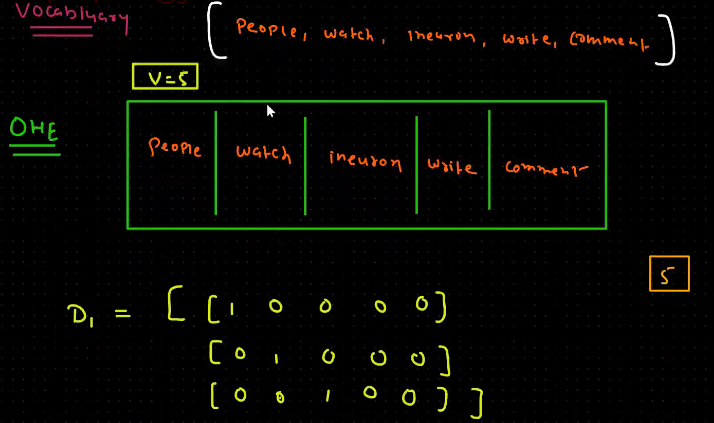

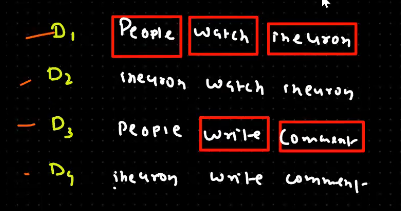

Pros: Easy to implement

cons: sparsity (sparse matrix), size of vector will not be fixed also when time of testing of new words is getting introduced in documents we cant handle that situation.

And also when vectors getting converted contextual info wont be there and also similarity among vectors will be zero and ut wont give that clarity.

In [ ]:
import pandas as pd

/tmp/ipykernel_650/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
data=pd.DataFrame({"text":["people watch ineuron","ineuron watch ineuron","people write comment","ineuron write comment"],"output":[1,1,0,0]})

In [ ]:
data.head()

,text,output
0,people watch ineuron,1
1,ineuron watch ineuron,1
2,people write comment,0
3,ineuron write comment,0


====================================================================================

# Bag of words

input: documents or sentences

output: vecotr output v~ integer value

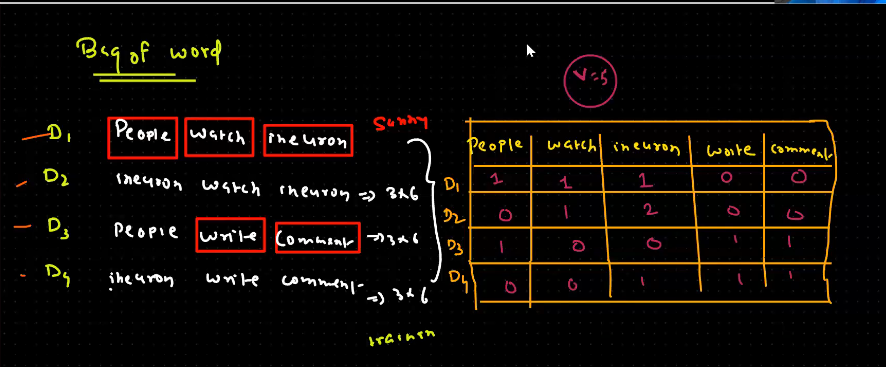

Advantages: Simple

Disadvantages : Sparsity is still here, and also this is not preserving order.

Advantage of BOW over one hot is if new word gets add into sentence then it wont get add into dimension. but by this we will lose info over here.

In [ ]:
#Document Matrix(BOW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
BOW=CountVectorizer()

input : Text

In [ ]:
document_matrix=BOW.fit_transform(data["text"])

In [ ]:
document_matrix

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

Here this is giving index to each word from 0-4 based on alphabets

In [ ]:
BOW.vocabulary_

{'people': 2, 'watch': 3, 'ineuron': 1, 'write': 4, 'comment': 0}

comment ineuron watch write people

In [ ]:
document_matrix[0].toarray()

array([[0, 1, 1, 1, 0]])

In [ ]:
document_matrix[1].toarray()

array([[0, 2, 0, 1, 0]])

In [ ]:
document_matrix[2].toarray()

array([[1, 0, 1, 0, 1]])

In [ ]:
document_matrix[3].toarray()

array([[1, 1, 0, 0, 1]])

#N-Grams

It helps in capturing the context and to reduce the ambiguity.

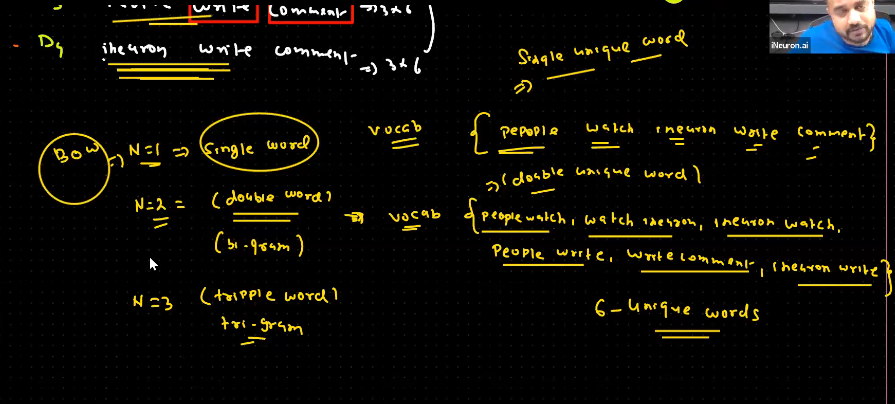

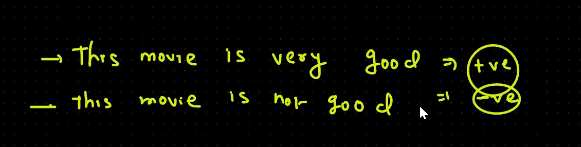

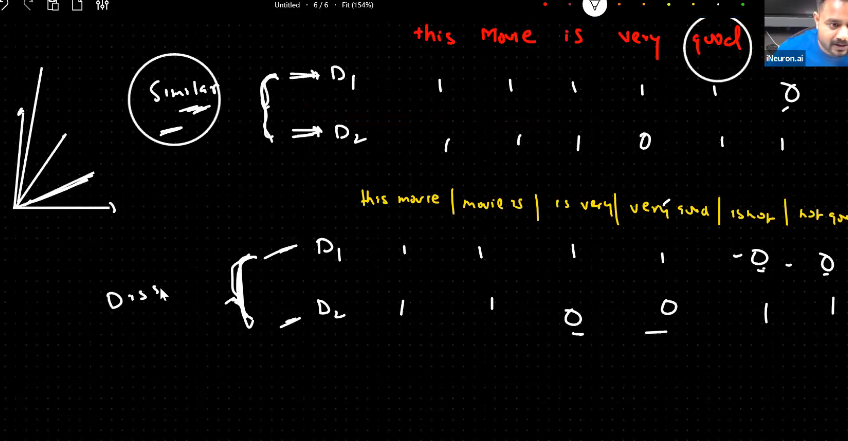

here we can see by applying n grams it can clearly tell both sentences are different and both lines are different

# Bigram

In [ ]:
bigram=CountVectorizer(ngram_range=(2,2))

In [ ]:
bigramvocab=bigram.fit_transform(data["text"])

In [ ]:
bigram.vocabulary_

{'people watch': 2,
 'watch ineuron': 4,
 'ineuron watch': 0,
 'people write': 3,
 'write comment': 5,
 'ineuron write': 1}

In [ ]:
trigram=CountVectorizer(ngram_range=(3,3))

#Trigram

In [ ]:
trigramdata=trigram.fit_transform(data["text"])

In [ ]:
trigram.vocabulary_

{'people watch ineuron': 2,
 'ineuron watch ineuron': 0,
 'people write comment': 3,
 'ineuron write comment': 1}

# mix

In [ ]:
mix=CountVectorizer(ngram_range=(1,2))

In [ ]:
mix_vocab=mix.fit_transform(data["text"])

In [ ]:
mix.vocabulary_

{'people': 4,
 'watch': 7,
 'ineuron': 1,
 'people watch': 5,
 'watch ineuron': 8,
 'ineuron watch': 2,
 'write': 9,
 'comment': 0,
 'people write': 6,
 'write comment': 10,
 'ineuron write': 3}

# TF-IDF

input: documents

output: numerical value

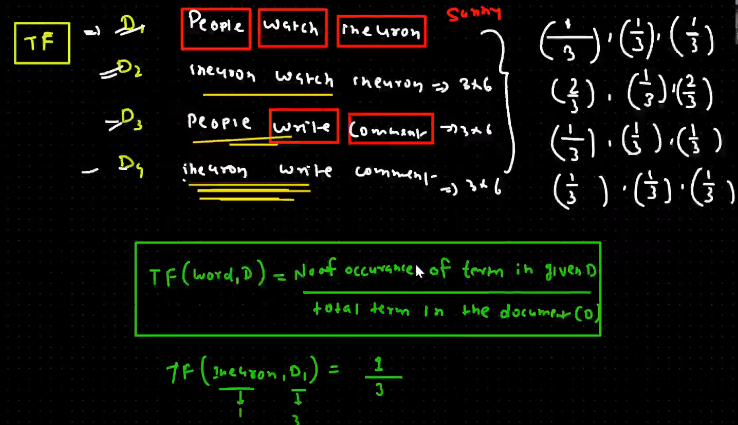

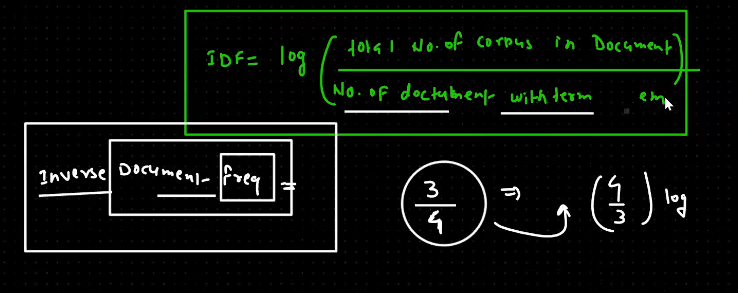

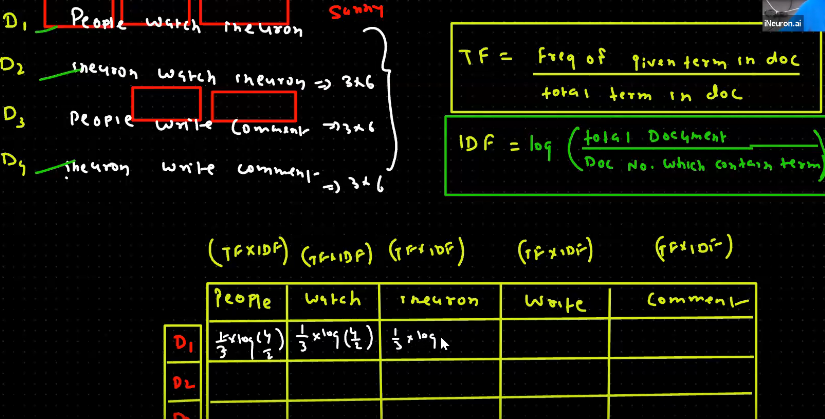

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf=TfidfVectorizer()

In [ ]:
tfidf.fit_transform(data["text"]).toarray()

array([[0.        , 0.49681612, 0.61366674, 0.61366674, 0.        ],
       [0.        , 0.8508161 , 0.        , 0.52546357, 0.        ],
       [0.57735027, 0.        , 0.57735027, 0.        , 0.57735027],
       [0.61366674, 0.49681612, 0.        , 0.        , 0.61366674]])

In [ ]:
tfidf.get_feature_names_out()

array(['comment', 'ineuron', 'people', 'watch', 'write'], dtype=object)

In [ ]:
tfidf.idf_

array([1.51082562, 1.22314355, 1.51082562, 1.51082562, 1.51082562])